## <center> Introducción </center>

Ya hemos visto la parte conceptual y matemática del aprendizaje profundo, la pregunta obvia que surge es, ¿Cómo lo llevamos a la práctica? y la respuesta por lo menos en la parte operativa es usando un **framework** de aprendizaje profundo. El framework permite automatizar las tareas más repetitivas de la contruncción, entrenamiento y despliegue del modelo.

Las Ventajas más comunes de usar una framework de aprendizaje profundo:

* Gradiente automático (No más derivadas a mano)
* Uso de aceleradores de computo (multihilos, GPU, TPU )
* Despliegue de los modelos en la nube o embebidos.
* Fácil construcción de flujos de datos para entrenamiento y despliegue.
* Fácil construcción de modelos.


<center>
<figure>
<img src=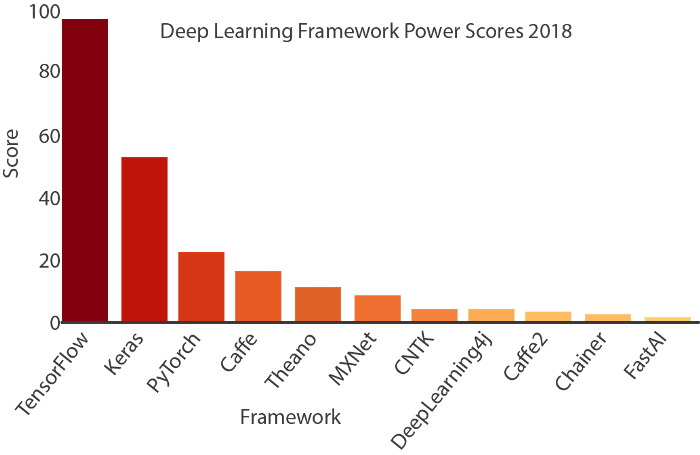 width="800"> 
<figcaption><a href=https://towardsdatascience.com/deep-learning-framework-power-scores-2018-23607ddf297a">Frameworks en aprendizaje profundo</a></figcaption>
</figure>
</center>

**TensorFlow** cuenta con un ecosistema fuerte tando para facilitar al investigador en el desarrollo de nuevos modelos (programación en bajo nivel), cómo para el ingeniero en el ciclo de entrenamiento-despliegue del modelo.

## Tensorflow 

TensorFlow es una **plataforma** de aprendizaje automático de código abierto, gratuita y basada en Python, desarrollada principalmente por **Google**. Al igual que NumPy, el propósito principal de TensorFlow es permitir que los ingenieros e investigadores manipulen expresiones matemáticas sobre tensores numéricos. Pero **TensorFlow va mucho más allá del alcance de NumPy** de las siguientes maneras.

* Puede calcular **automáticamente el gradiente de cualquier expresión diferenciable**, lo que lo hace muy adecuado para el aprendizaje automático.
Puede ejecutarse no solo en CPU, sino también en GPU y TPU, aceleradores de hardware altamente paralelos.
* La computación definida en **TensorFlow se puede distribuir fácilmente** entre muchas máquinas.
* Los programas de TensorFlow se pueden exportar a otros tiempos de ejecución, como C++, JavaScript (para aplicaciones basadas en navegador) o TensorFlow Lite (para aplicaciones que se ejecutan en dispositivos móviles o dispositivos integrados), etc. Esto hace que las aplicaciones de TensorFlow sean fáciles de implementar en entornos prácticos.

## Keras 

Keras es una API de aprendizaje profundo para Python, **construida sobre TensorFlow**, que proporciona una manera conveniente de definir y entrenar cualquier tipo de modelo de aprendizaje profundo. Keras se desarrolló inicialmente para la investigación, con el objetivo de permitir una experimentación rápida de aprendizaje profundo. A través de TensorFlow, Keras puede ejecutarse sobre diferentes tipos de hardware (GPU, TPU o CPU simple) y puede escalarse sin problemas a miles de máquinas.
**Keras es conocido por priorizar la experiencia del desarrollador. Es una API para seres humanos, no para máquinas.**

<center>
<figure>
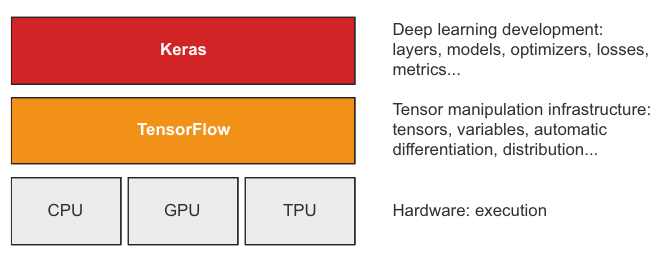 
<figcaption><a href="https://www.buscalibre.com.co/libro-deep-learning-with-python-libro-en-ingles-francois-chollet-manning-publications/9781617294433/p/48922694?gclid=Cj0KCQjw-pCVBhCFARIsAGMxhAeNzvJU3-eQzGFeXKI21tQwTx8YV2B7Nol764LZKs6jHw0wbrDa52oaAkSCEALw_wcB#">Tensorflow y Keras</a></figcaption>
</figure>
</center>

## Tensorflow práctica código

In [50]:
import tensorflow as tf

In [55]:
x = tf.ones(shape=(1,2))
print(x)

tf.Tensor([[1. 1.]], shape=(1, 2), dtype=float32)


In [56]:
x = tf.zeros(shape=(1,3))
x

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0., 0., 0.]], dtype=float32)>

In [58]:
x = tf.random.normal(shape=(3,1),mean=0,stddev=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[ 0.15785345],
       [-1.9261726 ],
       [ 1.4775294 ]], dtype=float32)>

En tensorflow los tensores no son asignables a diferencia de NumPy

In [60]:
x = tf.ones(shape=(2,2))
x[0,0] = 0.1

TypeError: ignored

Siempre queremos modificar los tensores que representan nuestro parámetros

In [63]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.647211  ],
       [ 0.41898173],
       [ 0.16895472]], dtype=float32)>

In [64]:
v[0,0].assign(3.3)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.3       ],
       [0.41898173],
       [0.16895472]], dtype=float32)>

In [65]:
v + tf.ones((3,1))

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[4.3      ],
       [1.4189818],
       [1.1689547]], dtype=float32)>

In [67]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.3      ],
       [1.4189818],
       [1.1689547]], dtype=float32)>

### Operaciones tensoriales básicas 

In [69]:
a = tf.ones((2,2))*4
a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

In [71]:
b = tf.square(a)
b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[16., 16.],
       [16., 16.]], dtype=float32)>

In [73]:
c = tf.sqrt(b)
c

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

In [75]:
e = tf.matmul(a,b)
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[128., 128.],
       [128., 128.]], dtype=float32)>

### [Gradiente automático](https://www.tensorflow.org/guide/autodiff)

In [76]:
import matplotlib.pyplot as plt

In [77]:
x = tf.linspace(-10.0,10.0,201)

In [78]:
with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.sin(x)

dy_dx= tape.gradient(y,x)

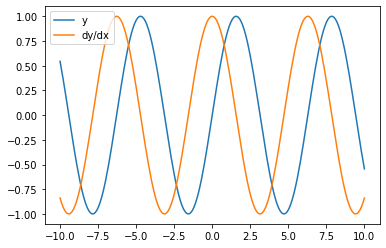

In [85]:
plt.plot(x,y,label='y')
plt.plot(x,dy_dx,label='dy/dx')
plt.legend()

**Tarea**: Doble derivada de la función

### Clasificador lineal con Tensorflow

  Queremos encontrar una función $g: \mathbb{R}^p \rightarrow  \{0,1\}$, tal que esta mapeé el conjunto $\mathbf{X} = \{\mathbf{x}_n \in \mathbb{R}^p \}_{n=1}^N$ al conjunto $\mathbf{Y} = \{\mathbf{y}_n \in \{0,1\}\}_{n=1}^N$

Para la primera capa 
$$g = \sigma(\mathbf{x}^T \mathbf{w} + b) \in \mathbb{R}$$

Donde $\sigma$ es la función de activación lineal, $\mathbf{w} \in \mathbb{R}^{p}$, y $b \in \mathbb{R}$.

$$g = \mathbf{x}^T \mathbf{w} + b \in \mathbb{R}$$


#### Dataset 

In [86]:
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0,3],
                                                 cov=[
                                                    [1,0.5],
                                                    [0.5,1]
                                                 ],
                                                 size=num_samples_per_class
                                                 )

positive_samples = np.random.multivariate_normal(mean=[1,0.5],
                                                 cov=[
                                                    [1,0.5],
                                                    [0.5,1]
                                                 ] ,
                                                 size=num_samples_per_class
                                                 )


In [87]:
X = np.vstack((negative_samples,positive_samples)).astype(np.float32)

In [88]:
X.shape

(2000, 2)

In [89]:
X

array([[-0.39169574,  2.6459837 ],
       [-0.708663  ,  2.0487876 ],
       [-0.39335266,  2.3944893 ],
       ...,
       [ 0.31994504, -0.24108697],
       [ 1.9080399 , -0.25775135],
       [ 1.3347121 ,  0.69579047]], dtype=float32)

In [97]:
y = np.vstack((
    np.zeros((num_samples_per_class,1),dtype='float32'),
    np.ones((num_samples_per_class,1),dtype='float32')
))

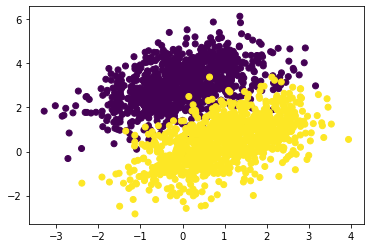

In [98]:
plt.scatter(X[:,0],X[:,1],c=y[:,0])

In [99]:
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

In [100]:
perc = 0.8
total = len(X)
X_train, y_train = X[:int(total*perc)], y[:int(total*perc)]
X_test, y_test = X[int(total*perc):], y[int(total*perc):]

#### Modelo

$$g = \sigma(\mathbf{x}^T \mathbf{w} + b) \in \mathbb{R}$$


In [103]:
class Model: 
    def __init__(self,input_dim,output_dim):
        self.W = tf.Variable(initial_value=tf.random.uniform(
            shape=(input_dim,output_dim)
        ))
        self.b = tf.Variable(initial_value=tf.zeros(
            shape=(output_dim,)
        ))

    def __call__(self,X):
        return tf.matmul(X,self.W) + self.b 

model = Model(2,1)

#### Funcion de costo

$$C(\mathbf{Y},\hat{\mathbf{Y}}) =\frac{1}{N} \sum_{n=1}^N (\mathbf{y_n}-\hat{\mathbf{y_n}})^2$$

In [102]:
def square_loss(y,y_pred):
    per_samples_losses = tf.square(y-y_pred)
    return tf.reduce_mean(per_samples_losses)

#### Entrenamiento

In [107]:
learning_rate = 0.1
def training_step(inputs,targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets,predictions)

    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, 
                                                     [model.W,model.b])
    model.W.assign_sub(grad_loss_wrt_W* learning_rate)
    model.b.assign_sub(grad_loss_wrt_b* learning_rate)
    return loss 

In [ ]:
model = Model(2,1)
for step in range(40):
    loss = training_step(X_train,y_train)
    print(f"Loss at step {step}: {loss:.4f}")

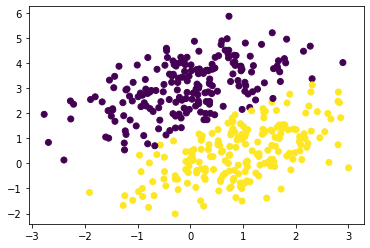

In [109]:
predictions = model(X_test)
y_pred = np.array(predictions > 0.5)
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred[:,0])

In [110]:
acc = sum((y_test == y_pred))/len(y_test)
acc

array([0.9625])

**Tareas**
* ¿Qué tipo de entrenamiento se acabo de hacer?, ¿mini-batch?, ¿batch?
* Plotear la curva de decisión

Con los visto hasta ahora es posible construir cualquier modelo de interes, pero hay una forma aun más sencilla, usando Keras.

## Keras

Antes de continuar, recordemos la anatomia básica para la contruncción y entrenamiento de un modelo de aprendizaje profundo 

<center>
<figure>
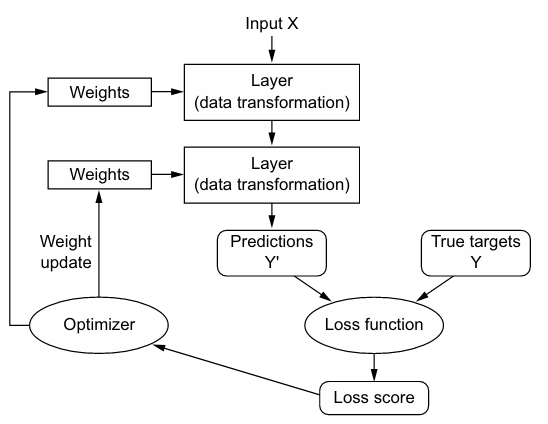 
<figcaption><a href="https://www.buscalibre.com.co/libro-deep-learning-with-python-libro-en-ingles-francois-chollet-manning-publications/9781617294433/p/48922694?gclid=Cj0KCQjw-pCVBhCFARIsAGMxhAeNzvJU3-eQzGFeXKI21tQwTx8YV2B7Nol764LZKs6jHw0wbrDa52oaAkSCEALw_wcB#">Anatomia de un modelo de aprendizaje profundo</a></figcaption>
</figure>
</center>

[Keras](https://keras.io/) define de forma conveniente cada uno de esos componentes.

* [Capas (layers)](https://keras.io/api/#layers-api)
* [Funciones de Costo (Loss Functions)](https://keras.io/api/#losses)
* [Optimizadores (optimizers)](https://keras.io/api/#optimizers)
* [y muchos más](https://keras.io/api/)

En el proceso de contrucción y entrenamiento del modelo siempre se realizan los siguientes pasos 

1. **Definición del modelo** (API secuencial o API funcional)
2. **Compilación del modelo** (Definición de función de costo, optimizador y métricas)
3. **Entrenamiento del modelo**
4. **Visualización del rediemiento**

### 1.Definición del modelo

En la difinición del modelo nos concentramos en la arquitectura de este, que capas, cuantas capas, que conexiones etc. Para definir esta arquitectura tenemos dos opciones, la API secuencial y la API funcional.

<center>
<figure>
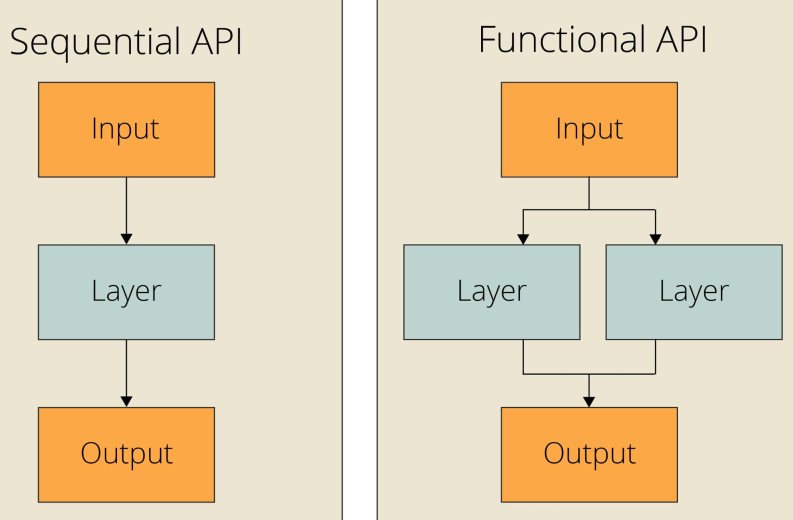 
<figcaption><a href="https://www.youtube.com/watch?v=ittokQvuNg8">API secuencial vs API funcional</a></figcaption>
</figure>
</center>


#### API secuencial

In [111]:
model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=32,activation=tf.keras.activations.tanh),
            tf.keras.layers.Dense(units=32,activation=tf.keras.activations.tanh),
            tf.keras.layers.Dense(units=1,activation=tf.keras.activations.sigmoid),
])

#### API funcional

In [113]:
input = tf.keras.layers.Input(shape=(2,))
x_1 = tf.keras.layers.Dense(units=32,activation=tf.keras.activations.tanh)(input)
x_2 = tf.keras.layers.Dense(units=32,activation=tf.keras.activations.tanh)(x_1)
y = tf.keras.layers.Dense(units=1,activation=tf.keras.activations.sigmoid)(x_2)

model = tf.keras.Model(input,y)

### 2.Compilación del modelo

In [114]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics= [tf.keras.metrics.BinaryAccuracy()]
)

#### Inspeccionando el modelo

In [115]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_12 (Dense)            (None, 32)                96        
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.layers

In [117]:
model.layers[1].weights

[<tf.Variable 'dense_12/kernel:0' shape=(2, 32) dtype=float32, numpy=
 array([[-0.11087662,  0.2620444 , -0.24024181, -0.35278752, -0.1176182 ,
          0.16113159,  0.14051422,  0.07650715,  0.19088599, -0.3343867 ,
          0.00984913, -0.4000802 , -0.17730798, -0.17442319,  0.3296993 ,
         -0.3873519 ,  0.27681103, -0.19981009,  0.06020769,  0.19346091,
          0.36771634,  0.20339659, -0.05759281, -0.27583608, -0.14846411,
          0.2486684 , -0.15090281, -0.05976748, -0.26039797, -0.31233078,
          0.35194692,  0.27080664],
        [-0.11357152,  0.24720845,  0.15873346,  0.24100551,  0.19253579,
         -0.13437447,  0.2789329 , -0.08941552, -0.37795028, -0.14554447,
         -0.29703218, -0.09946287,  0.30559883, -0.0305813 ,  0.31730554,
          0.11632439, -0.1282771 ,  0.17699268, -0.30604008, -0.08159226,
          0.13289145, -0.40015173, -0.08300406, -0.01075324, -0.38354737,
          0.01075613,  0.05390647, -0.28069717, -0.38108525,  0.24437806,
      

In [120]:
model.layers[1].trainable = True 

In [121]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_12 (Dense)            (None, 32)                96        
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


### 3.Entrenamiento 

In [122]:
history = model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=40,
          batch_size=4)

Epoch 1/40
400/400 [==============================] - 1s 2ms/step - loss: 0.4898 - binary_accuracy: 0.8562 - val_loss: 0.4158 - val_binary_accuracy: 0.8650
Epoch 2/40
400/400 [==============================] - 1s 2ms/step - loss: 0.3596 - binary_accuracy: 0.9062 - val_loss: 0.3396 - val_binary_accuracy: 0.8925
Epoch 3/40
400/400 [==============================] - 1s 2ms/step - loss: 0.2958 - binary_accuracy: 0.9181 - val_loss: 0.2911 - val_binary_accuracy: 0.9075
Epoch 4/40
400/400 [==============================] - 1s 2ms/step - loss: 0.2536 - binary_accuracy: 0.9300 - val_loss: 0.2572 - val_binary_accuracy: 0.9150
Epoch 5/40
400/400 [==============================] - 1s 2ms/step - loss: 0.2236 - binary_accuracy: 0.9350 - val_loss: 0.2318 - val_binary_accuracy: 0.9175
Epoch 6/40
400/400 [==============================] - 1s 2ms/step - loss: 0.2013 - binary_accuracy: 0.9369 - val_loss: 0.2127 - val_binary_accuracy: 0.9200
Epoch 7/40
400/400 [==============================] - 1s 2ms/ste

### 4.Visualización del rendimiento

In [123]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 4ms/step - loss: 0.1038 - binary_accuracy: 0.9675


[0.10381168127059937, 0.9674999713897705]

Text(0.5, 0, 'epoch')

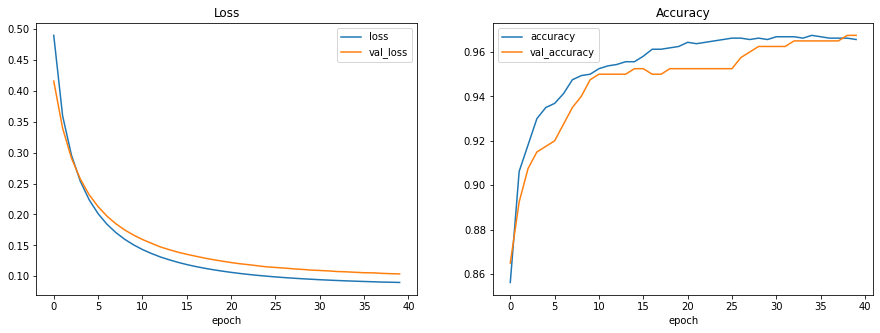

In [125]:
loss = history.history['loss']
accuracy = history.history['binary_accuracy']

val_loss = history.history['val_loss']
val_accuracy = history.history['val_binary_accuracy']

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

plt.subplot(122)
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

**Tarea**: Con los mismos pasos anteriores realzar clasificación sobre la base de datos MNIST de digitos.

Para ello:

* Función de activación última capa softmax 
* Sparse categorical crossentropy 
* Dataset displonibles en keras 

# Referencias 
* [Deep Learning With Python](https://www.buscalibre.com.co/libro-deep-learning-with-python-libro-en-ingles-francois-chollet-manning-publications/9781617294433/p/48922694?gclid=Cj0KCQjw-pCVBhCFARIsAGMxhAeNzvJU3-eQzGFeXKI21tQwTx8YV2B7Nol764LZKs6jHw0wbrDa52oaAkSCEALw_wcB#)